In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, confusion_matrix, r2_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/machine learning/knn_datasets.csv')
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,3,126,88.0,41,235,39.3,0.704,27,0
1,8,99,84.0,0,0,35.4,0.388,50,0
2,7,196,90.0,0,0,39.8,0.451,41,1
3,9,119,80.0,35,0,29.0,0.263,29,1
4,11,143,94.0,33,146,36.6,0.254,51,1
5,10,125,70.0,26,115,31.1,0.205,41,1
6,7,147,76.0,0,0,39.4,0.257,43,1
7,1,97,66.0,15,140,23.2,0.487,22,0
8,13,145,82.0,19,110,22.2,0.245,57,0
9,5,117,92.0,0,0,34.1,0.337,38,0


In [ ]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9
count,480.000000,480.000000,479.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,3.779167,121.087500,69.033403,20.714583,79.135417,32.022083,0.485019,32.916667,0.352083
std,3.335327,32.312033,19.100344,15.632784,114.186313,8.145896,0.337495,11.606336,0.478118
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.075000,0.254000,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,36.500000,32.000000,0.384000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,122.750000,36.600000,0.645500,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,744.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

X1    0
X2    0
X3    1
X4    0
X5    0
X6    0
X7    0
X8    0
X9    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      480 non-null    int64  
 1   X2      480 non-null    int64  
 2   X3      479 non-null    float64
 3   X4      480 non-null    int64  
 4   X5      480 non-null    int64  
 5   X6      480 non-null    float64
 6   X7      480 non-null    float64
 7   X8      480 non-null    int64  
 8   X9      480 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 33.9 KB


Disini saya langsung melakukan correlation matrix karena data yang ada sudah berbentuk int/float semua tanpa adanya string yang perlu diconvert.

In [ ]:
corrMatrix = df.corr(method='pearson')
corrMatrix.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9
X1,1.000000,0.186804,0.137303,-0.030520,-0.017375,0.065701,-0.041453,0.542114,0.226904
X2,0.186804,1.000000,0.110878,0.025703,0.325182,0.254557,0.159746,0.297865,0.442458
X3,0.137303,0.110878,1.000000,0.209518,0.097617,0.289332,0.010226,0.211052,0.043653
X4,-0.030520,0.025703,0.209518,1.000000,0.460996,0.384253,0.170940,-0.141267,0.051739
X5,-0.017375,0.325182,0.097617,0.460996,1.000000,0.222874,0.234140,-0.047358,0.119389
X6,0.065701,0.254557,0.289332,0.384253,0.222874,1.000000,0.120453,0.067594,0.333234
X7,-0.041453,0.159746,0.010226,0.170940,0.234140,0.120453,1.000000,0.033701,0.177169
X8,0.542114,0.297865,0.211052,-0.141267,-0.047358,0.067594,0.033701,1.000000,0.195662
X9,0.226904,0.442458,0.043653,0.051739,0.119389,0.333234,0.177169,0.195662,1.000000


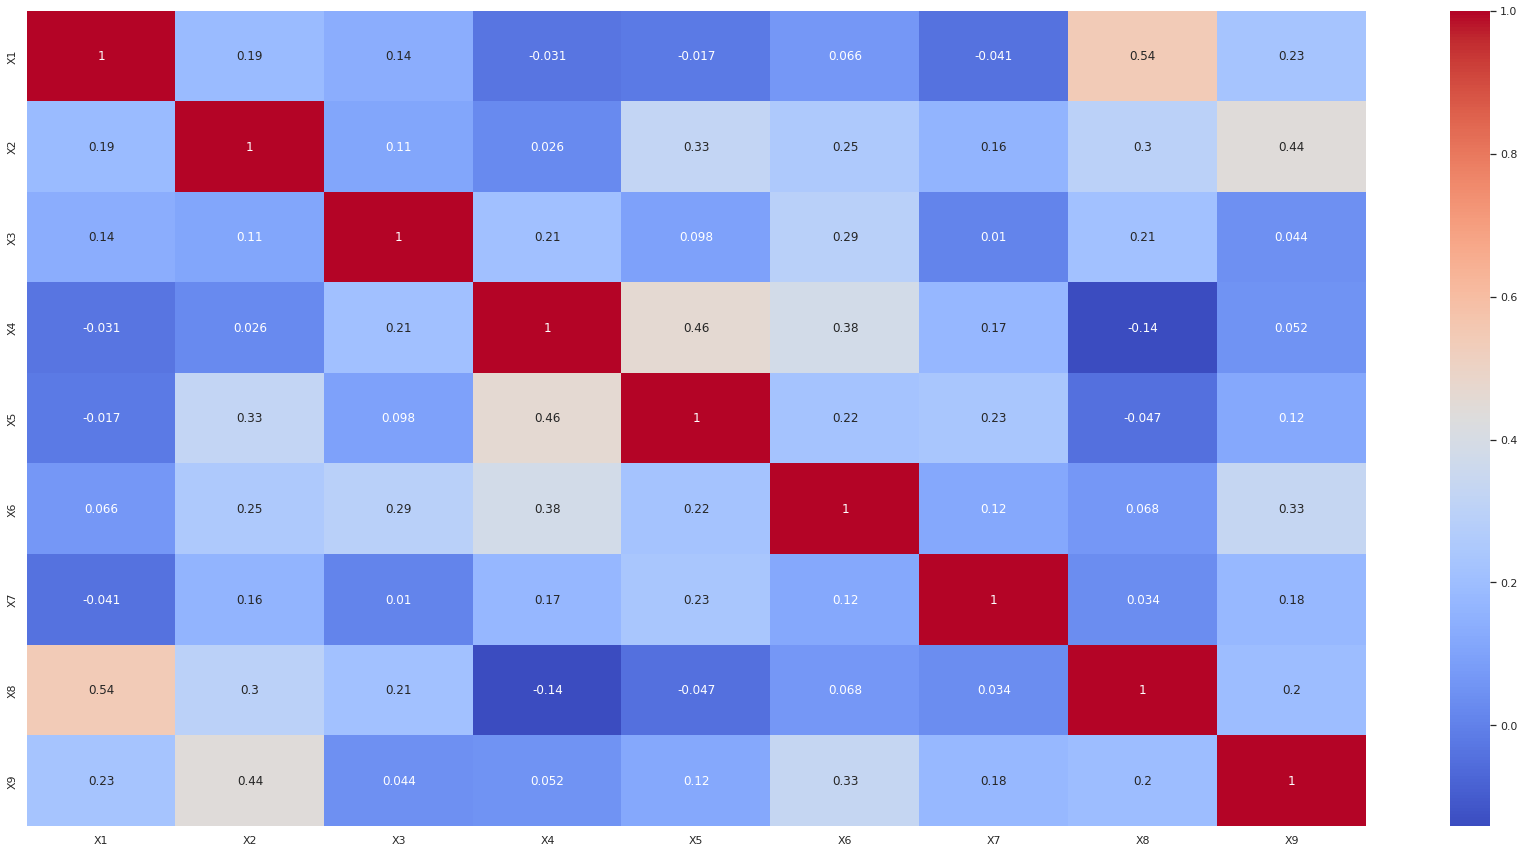

In [ ]:
plt.figure(figsize=(30, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Dari correlation matrix ini, dapat dilihat hasil korelasi yang tinggi bisa dibilang sedikit, maka saya akan mengambil fitur yang memiliki korelasi paling tinggi dengan kolom X9 yaitu X2 dengan nilai 0.44 dan X6 dengan nilai 0.33

Splitting data into X and Y

In [ ]:
X = np.array(df[['X2','X6']])
y = np.array(df['X9'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(384, 2)

Mencari optimal k-value

In [ ]:
def euclidean(p1, p2):
  return np.sqrt(np.sum((p1 - p2)**2))

def knn_regression(X_train, y_train, X_test, k):
  pred = []

  for x in X_test:
    dist = []

    for train in X_train:
      dist.append(euclidean(x, train))

    dist = np.array(dist)
    top_k = np.argsort(dist)[:k]

    y_values = y_train[top_k]
    pred.append(np.mean(y_values))

  return pred

In [ ]:
#error = []
#for k in range(1, 20):
#  y_pred = knn_regression(X_train, y_train, X_test, k)
#  error.append(np.sqrt(mean_squared_error(y_test, y_pred))) # RMSE

In [ ]:
#plt.figure(figsize=(12, 8))
#plt.plot(error, marker='o', markerfacecolor='red', markersize=10)
#plt.title('RMSE Rate vs. K Value')
#plt.xticks(np.arange(0, len(error), 1.0))
#plt.xlabel('K')
#plt.ylabel('RMSE Rate')
#plt.show()

Elbow method

In [ ]:
error_rate = []
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

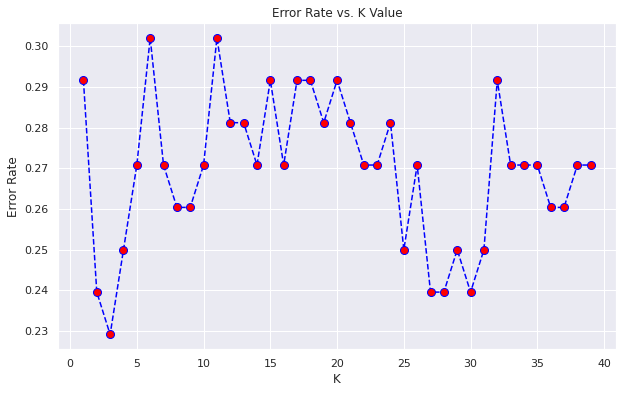

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

disini saya melihat nilai paling baik ada pada angka 3, best k value setelah 3 jaraknya agak cukup jauh tapi saya akan tetap mencoba juga yaitu pada 2,27,28,30

In [ ]:
# K = 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=3')
print('\n')
#print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

WITH K=3


              precision    recall  f1-score   support

           0       0.80      0.87      0.83        63
           1       0.70      0.58      0.63        33

    accuracy                           0.77        96
   macro avg       0.75      0.72      0.73        96
weighted avg       0.76      0.77      0.76        96



In [ ]:
# K = 2
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=2')
print('\n')
#print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

WITH K=2


              precision    recall  f1-score   support

           0       0.74      0.97      0.84        63
           1       0.86      0.36      0.51        33

    accuracy                           0.76        96
   macro avg       0.80      0.67      0.68        96
weighted avg       0.78      0.76      0.73        96



In [ ]:
# K = 27
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=27')
print('\n')
#print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

WITH K=27


              precision    recall  f1-score   support

           0       0.78      0.89      0.83        63
           1       0.71      0.52      0.60        33

    accuracy                           0.76        96
   macro avg       0.74      0.70      0.71        96
weighted avg       0.75      0.76      0.75        96

